# **Project 2: Analysis about Housing and Crime Data in Austin in 2015**

The aim of this study is to explore the socio-economic and demographic statistics of Austin in terms of the crime rate. 

We investigate trends and patterns among various geographical locations, and find the relationship between population below poverty level, median household income, and unemployment. 

In [ ]:
#Importing relevant packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
from numpy.polynomial.polynomial import polyfit

## **Data Preparation**





In [ ]:
#Reading CSV file
data_crime = pd.read_csv("crime-housing-austin-2015.csv")


#Cleaning the data, only keeping what we need
data_crime = data_crime[['Clearance_Status', 'X_Coordinate', 'Y_Coordinate', 'Populationbelowpovertylevel', 
                        'Medianhouseholdincome', 'Populationwithdisability', 'Unemployment','Averagemonthlytransportationcost',
                        'Highest_NIBRS_UCR_Offense_Description']].dropna()
columns = data_crime.columns

#Creating a for loop
for colname in columns:
    if colname in ['Medianhouseholdincome','Populationbelowpovertylevel','Populationwithdisability', 
                   'Unemployment','Averagemonthlytransportationcost']:
        data_crime[colname] = data_crime[colname].str.replace('%', '')
        data_crime[colname] = data_crime[colname].str.replace('$', '')
        data_crime[colname] = data_crime[[colname]].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()


## **Data Visualization**

### **Geographical Scatter Plots**

[Text(0, 0.5, 'Y Cordinate'),
 Text(0.5, 0, 'X Cordinate'),
 Text(0.5, 1.0, 'Median HouseHold Income (Austin)')]

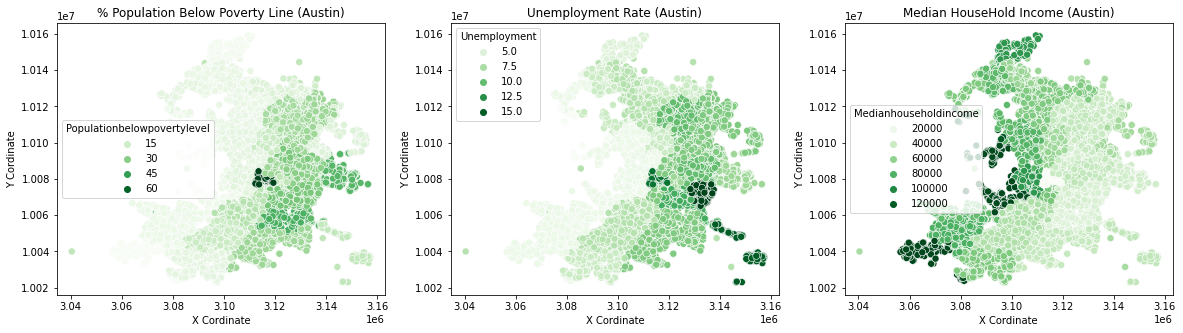

In [ ]:
#Displaying plots 
f, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=False)

#Plotting scatterplots for Population below poverty-line in the form of geographical map of Austin
xypopulation = sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', palette='Greens', 
                               data=data_crime.dropna(), hue='Populationbelowpovertylevel',
                               ax = axes[0], s=50)

#Plotting scatterplots for Unemployment below poverty-line in the form of geographical map of Austin
xyunemployment = sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', palette='Greens', 
                                data=data_crime.dropna(), hue='Unemployment',
                                ax = axes[1], s=50)

#Plotting scatterplots for Median Household Income in the form of geographical map of Austin
xyincome = sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', palette='Greens', 
                                data=data_crime.dropna(), hue='Medianhouseholdincome',
                                ax = axes[2], s=50)

#Labelling the axis
xypopulation.set(xlabel='X Cordinate', ylabel='Y Cordinate', 
                   title='% Population Below Poverty Line (Austin)')

xyunemployment.set(xlabel='X Cordinate', ylabel='Y Cordinate', 
                   title='Unemployment Rate (Austin)')

xyincome.set(xlabel='X Cordinate', ylabel='Y Cordinate', 
                   title='Median HouseHold Income (Austin)')

**Interpretation**

We visualise socio-economic statistics i.e. unemployment, median income, and poverty income with scatter plots: identifying clusters with respect to the x and y coordinate axis.  This graphical representation was preferred for the dataset as it allowed us to pinpoint the exact location of each data point.

There appears to be a sharp contrast between different demographic regions; where there’s a high percentage of population below poverty level, it follows with the high unemployment rate, low median household income and vice versa. In Western Austin, households have a higher median income, with a low unemployment rate. In the East, there is a high density of people below the poverty line. Unsurprisingly, this coincides with a high unemployment rate and a low median household income.

### **Scatter Plot with Regression** (Median House Income with Poverty Line)

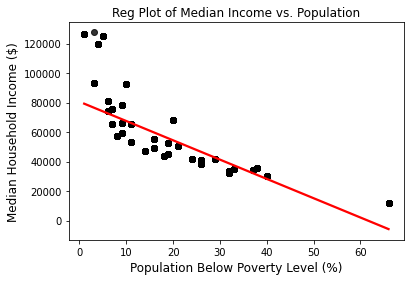


The correlation in this graph is -0.8234222444730773


In [ ]:
fig, ax = plt.subplots(figsize = ( 6 , 4 ))

# Population Below Poverty Level and Median HouseHold Income
correlation = data_crime['Medianhouseholdincome'].corr(data_crime['Populationbelowpovertylevel'])

#Here's the correlation value of median household income and population below poverty line
correlation

# Regression Plot
sns.regplot(x='Populationbelowpovertylevel', y='Medianhouseholdincome', data=data_crime,
            scatter_kws={"color": "black"}, 
            line_kws={"color": "red"}).set(title='correlation value is {}'.format(correlation) )

# Set label for x-axis
ax.set_xlabel( "Population Below Poverty Level (%)" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Median Household Income ($)" , size = 12 )
  
# Set title for plot
ax.set_title('Reg Plot of Median Income vs. Population') 

# ax.set_suptitle("correlation value is {}'.format(correlation) , size = 10" )

# Display figure
plt.show()

#The correlation calculated is the following
print ("\nThe correlation in this graph is {}" .format(correlation))


### **ScatterPlot with Regression** (Unemployment with Poverty Line)

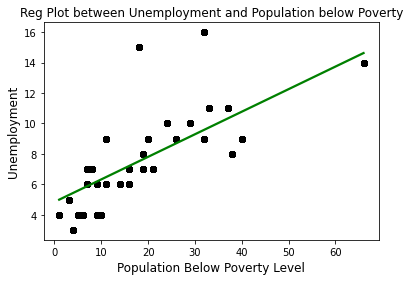

The standard deviation for unemployment is = 2.4731277085687595 and the correlation is 0.7828682088818627


In [ ]:
fig, ax = plt.subplots(figsize = ( 6 , 4 ))

# Populationbelowpovertylevel and Unemployment
correlation = data_crime['Unemployment'].corr(data_crime['Populationbelowpovertylevel'])

# Regplot
sns.regplot(x='Populationbelowpovertylevel', y='Unemployment', data=data_crime,
            scatter_kws={"color": "black"},
            line_kws={"color": "green"}).set(title='correlation value is {}'.format(correlation))

# Set label for x-axis
ax.set_xlabel( "Population Below Poverty Level" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Unemployment" , size = 12 )
  
# Set title for plot
# ax.set_title( 'correlation value is {}'.format(correlation) , size = 14 )
ax.set_title("Reg Plot between Unemployment and Population below Poverty")

# Display figure
plt.show()

#Calculating the standandard deviation for Unemployment
st = data_crime['Unemployment'].std()

print(f'The standard deviation for unemployment is = {st} and the correlation is {correlation}')


**Calculating Mean**

In [ ]:
data_crime['Unemployment'].mean()

8.279759359051122

**Interpretation**

We calculated a very strong negative correlation of -0.8 between median household income and the population below the poverty level, and a very strong positive correlation of 0.78 between Median Income and population below poverty line. 

This affirms what we already know: **unemployment, with low income is strongly correlated to poverty.**

### **Bar Chart for Crime Types in Austin**

Text(0.5, 1.0, 'Crime Rate in Austin')

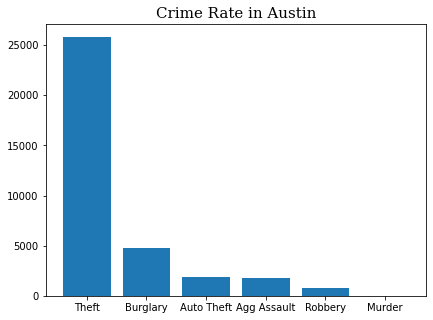

In [ ]:
#Setting the figure size
plt.figure(num=None, figsize=(15, 5))

cleared_crimes = data_crime[data_crime['Clearance_Status'] == 'C']
not_cleared_crimes = data_crime[data_crime['Clearance_Status'] == 'N']

plt.subplot(1, 2, 1)

#Plotting the total types of crime rate in Austin with the "value count" function
crime_types = data_crime['Highest_NIBRS_UCR_Offense_Description'].value_counts().reset_index()
plt.bar(crime_types['index'],crime_types['Highest_NIBRS_UCR_Offense_Description'])
font1 = {'family':'serif','color':'black','size':15}

#Customizing the plot title 
plt.title("Crime Rate in Austin", fontdict = font1)


**Interpretation**

Theft is the most common crime in Austin with more than 25,000 counts **yearly**, followed by Burglary and Auto Theft.

### **Geographical Scatterplot for Monthly Transporation Cost**

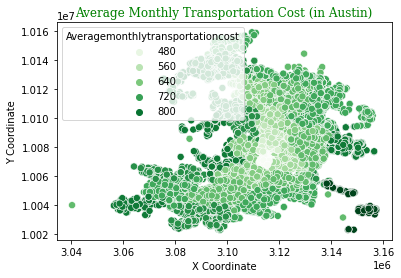

In [ ]:
#Another scatterplot for Average Transportation to Downtown in Austin
x = sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', palette='Greens', 
                data=data_crime.dropna(), hue='Averagemonthlytransportationcost', s=50)

font1 = {'family':'serif','color':'green','size':12}
# x.set(title= "Average Monthly Transportation Cost (in Austin)", fontdict = font1)
plt.title("Average Monthly Transportation Cost (in Austin)", fontdict = font1)

x.set_ylabel("Y Coordinate")
x.set_xlabel("X Coordinate")

plt.show()

**Interpretation**

We plotted a scatterplot for the average monthly transportation cost from the downtown, to reaffirm what we believe: 

* **The average transportation cost is more in suburbs and the closer you get to the downtown, this value reduces.**

* **People in the East & West pay more than others to reach downtown probably because of the poor transportation system.**


### **Conducting t-test Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


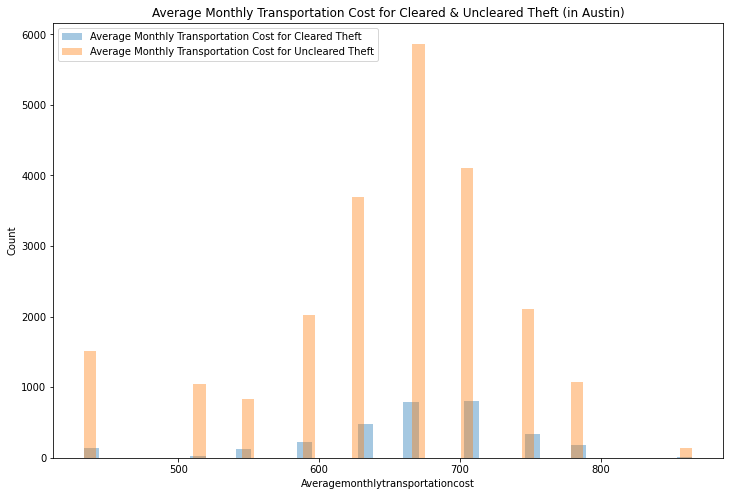

In [ ]:
#Setting the figure size
plt.figure(figsize=(12,8))

#Distribution plot of "Histogram" for Cleared Theft.
x = sns.distplot(cleared_crimes[cleared_crimes.Highest_NIBRS_UCR_Offense_Description == "Theft"].Averagemonthlytransportationcost, 
             label='Average Monthly Transportation Cost for Cleared Theft', 
             hist=True, kde=False)

#Setting the title of the axis
x.set(title= "Average Monthly Transportation Cost for Cleared & Uncleared Theft (in Austin)")
#x.set_xlabel("Average Monthly Transport Cost")
x.set_ylabel("Count")

#Distribution plot of "Histogram" for Uncleared Theft.
sns.distplot(not_cleared_crimes[not_cleared_crimes.Highest_NIBRS_UCR_Offense_Description == "Theft"].Averagemonthlytransportationcost, 
             label='Average Monthly Transportation Cost for Uncleared Theft', 
             hist=True, kde=False)

#Setting the legends
plt.legend()

### **T-test Results**

In [ ]:
#Displaying the t-test stats. 
display(stats.ttest_ind(cleared_crimes[cleared_crimes.Highest_NIBRS_UCR_Offense_Description == "Theft"].Averagemonthlytransportationcost, 
                        not_cleared_crimes[not_cleared_crimes.Highest_NIBRS_UCR_Offense_Description == "Theft"].Averagemonthlytransportationcost))



Ttest_indResult(statistic=10.376356389717213, pvalue=3.565120800869899e-25)

**Interpretation**

With our t-test, we can claim with 95% certainty that the means of the two populations, for both cleared and uncleared theft, are not the same (with the p-value equal to 3.565e-25). 

We can infer that the cleared thefts are higher than uncleared thefts in the suburbs where more families live and communities are closer compared to downtown. The difference between the two is statistically significant and suggests it is unsafe for individuals to live downtown. It is recommended that when going downtown, they should take more precautionary measures.

#### **Calculating Mean and Standard Deviation**

In [ ]:
meanClearedTransport = cleared_crimes[cleared_crimes.Highest_NIBRS_UCR_Offense_Description == "Theft"].Averagemonthlytransportationcost.mean()
stddevClearedTransport = cleared_crimes[cleared_crimes.Highest_NIBRS_UCR_Offense_Description == "Theft"].Averagemonthlytransportationcost.std()

meanNotClearedTransport = not_cleared_crimes[not_cleared_crimes.Highest_NIBRS_UCR_Offense_Description == "Theft"].Averagemonthlytransportationcost.mean()
stddevNotClearedTransport = not_cleared_crimes[not_cleared_crimes.Highest_NIBRS_UCR_Offense_Description == "Theft"].Averagemonthlytransportationcost.std()

In [ ]:
print(f'Mean average transportation cost of cleared crimes (For Theft): {meanClearedTransport}')
print(f'Standard deviation of transportation cost of cleared crimes (For Theft): {stddevClearedTransport}')
print(f'Mean average transportation cost of uncleared crimes (For Theft): {meanNotClearedTransport}')
print(f'Standard deviation of transportation cost of uncleared crimes (For Theft): {stddevNotClearedTransport}')

Mean average transportation cost of cleared crimes (For Theft): 665.6822279459111
Standard deviation of transportation cost of cleared crimes (For Theft): 76.55561660946324
Mean average transportation cost of uncleared crimes (For Theft): 648.595841513475
Standard deviation of transportation cost of uncleared crimes (For Theft): 87.2333567038258
